In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# supervised learning
# we will predict hand-written numbers

## Step -1 Data Preparation

In [3]:
df = pd.read_csv('mnist_train.csv')

In [4]:
print(df.shape)

(42000, 785)


In [5]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [8]:
# x -> pixel values
X = data[:,1:]
# y -> labels
Y = data[:,0]


In [9]:
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


Forming training and testing data

In [10]:
split = int(0.8 * X.shape[0])
print(split)

x_train = X[:split , :]
y_train = Y[:split]
x_test =  X[split: ,: ]
y_test =  Y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


In [11]:
def drawImg(sample):
    img = sample.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()

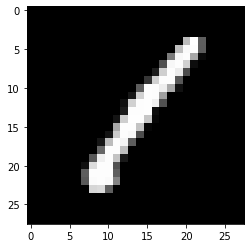

In [12]:
drawImg(x_train[0])
# it's a one

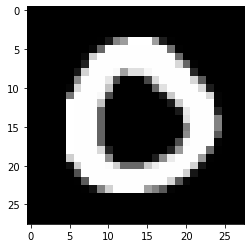

In [13]:
drawImg(x_train[4])
# it's a 0

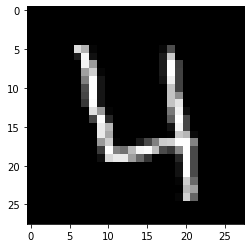

In [14]:
drawImg(x_train[3])
# it's a 4

## Step -2 K-NN

In [15]:
# Can we apply KNN to this ?

In [16]:
def dis(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query,k=5):
    val = []
    m = X.shape[0]
    
    for i in range(m):
        d = dis(query , X[i])
        val.append((d,Y[i]))
    val = sorted(val)
    val=val[:k]
    val=np.array(val)
    print(val)
    
    new_val = np.unique(val[:,1],return_counts=True)
    print(new_val)
    
    max_freq_index = new_val[1].argmax()
    pred = new_val[0][max_freq_index]
    
    return pred
        

## Step3:Make Predictions

In [17]:
pred = knn(x_train , y_train ,x_test[0])
print(int(pred))

[[1213.36886395    0.        ]
 [1235.20322215    0.        ]
 [1328.63576649    0.        ]
 [1400.12285175    0.        ]
 [1411.82612244    0.        ]]
(array([0.]), array([5]))
0


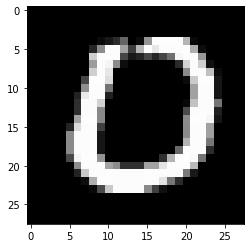

In [18]:
drawImg(x_test[0])

In [19]:
pred = knn(x_train , y_train ,x_test[1])
print(pred)

[[1145.78095638    7.        ]
 [1150.19346199    7.        ]
 [1171.67572306    7.        ]
 [1215.04032855    7.        ]
 [1280.82590542    7.        ]]
(array([7.]), array([5]))
7.0


In [20]:
pred = knn(x_train , y_train ,x_test[24])
print(pred)

[[1133.86198455    2.        ]
 [1366.18666367    2.        ]
 [1420.57805136    2.        ]
 [1467.4324516     2.        ]
 [1511.62263809    2.        ]]
(array([2.]), array([5]))
2.0


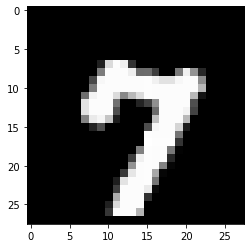

In [21]:
drawImg(x_test[1])
# it's a one

In [22]:
# write one method which computes accuracy of KNN over the test data.
x_test.shape[0]

8400

In [23]:
def checkAccuracy(x_test):
    c=0
    for i in range(x_test.shape[0]):
        pred = knn(x_train , y_train ,x_test[1])
        if(pred == y_test[i]):
            c=c+1;
    accuracy = c / x_test.shape[0]
    return accuracy

In [ ]:
checkAccuracy(x_test)

[[1145.78095638    7.        ]
 [1150.19346199    7.        ]
 [1171.67572306    7.        ]
 [1215.04032855    7.        ]
 [1280.82590542    7.        ]]
(array([7.]), array([5]))
[[1145.78095638    7.        ]
 [1150.19346199    7.        ]
 [1171.67572306    7.        ]
 [1215.04032855    7.        ]
 [1280.82590542    7.        ]]
(array([7.]), array([5]))
